# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

## **Importing the necessary libraries**

In [39]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import h5py as h5

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# import tenserflow and its libraries
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend


# Command to tell Python to actually display the graphs
%matplotlib inline

**Let us check the version of tensorflow.**

In [40]:
# print version number of tenserflow
required_tensorflow_version = '2.14.0'
current_tensorflow_version = tf.__version__

if current_tensorflow_version <= required_tensorflow_version:
  print("The loaded tensorflow has version of " + current_tensorflow_version + ", which is not updated to perform the necessary tasks. " + required_tensorflow_version + " or later is required.")
else:
  print("The loaded tensorflow has version of " + current_tensorflow_version + ", which supports the necessary tasks")

The loaded tensorflow has version of 2.16.1, which supports the necessary tasks


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [41]:
# read the data file
h5f = h5.File('./SVHN_Digit_Recognition_Dataset.h5')

Check the number of images in the training and the testing dataset.

In [42]:
# check the columns of the dataset
print("dataset has these columns" + str(list(h5f.keys())))

# check the number of data in the dataset
for k in h5f.keys():
  print("column " + k + " has " + str(len(h5f[k][:])) + " rows.")

# assign x_test, x_train, x_val, y_test, y_train, y_val for later use
x_test = h5f["X_test"][:]
x_train = h5f["X_train"][:]
x_val = h5f["X_val"][:]
y_test = h5f["y_test"][:]
y_train = h5f["y_train"][:]
y_val = h5f["y_val"][:]

# close h5 file to save memory
h5f.close()

# check the type of x_test and others
print("type of x_test is " + str(type(x_test)))
print("shape of x_test is " + str(x_test.shape))
print("each record of x_test has an image of " + str(x_test.shape[1]) + "x" + str(x_test.shape[2]) + " pixels.")

dataset has these columns['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
column X_test has 18000 rows.
column X_train has 42000 rows.
column X_val has 60000 rows.
column y_test has 18000 rows.
column y_train has 42000 rows.
column y_val has 60000 rows.
type of x_test is <class 'numpy.ndarray'>
shape of x_test is (18000, 32, 32)
each record of x_test has an image of 32x32 pixels.


**Observation:**

## **Visualizing images**

- Use x_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

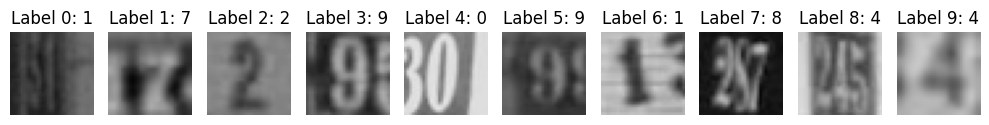

the first 10 labels in y_train are: [2 6 7 4 4 0 3 0 7 3]


In [43]:
# create an iamge from 32x32 pixel data using plt.imshow() function

fig, ax = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
  plt.subplot(1, 10, i+1)
  ax[i].imshow(x_test[i], cmap='gray', vmin=0, vmax=255) # use vmin, vmax to set the range of the values
  ax[i].axis('off')  # turn off axis
  ax[i].set_title(f'Label {i}: ' + str(y_test[i]))

plt.tight_layout() # adjust layout
plt.show()

# print first 10 labels from y_train
print("the first 10 labels in y_train are: " + str(y_train[:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [44]:
# print the shape of the train array and the array of pixels in the first image
print("shape of x_train: " + str(x_train.shape))
print("array of x_train[0]: " + str(x_train[0]))

print("shape of x_test: " + str(x_test.shape))
print("array of x_test[0]: " + str(x_test[0]))

# print the shape of the train array and the value of the first item
print("shape of y_train: " + str(y_train.shape))
print("value of y_train[0]: " + str(y_train[0]))

print("shape of y_test: " + str(y_test.shape))
print("value of y_test[0]: " + str(y_test[0]))

shape of x_train: (42000, 32, 32)
array of x_train[0]: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
shape of x_test: (18000, 32, 32)
array of x_test[0]: [[ 40.558   46.7917  48.9764 ... 112.1153 112.9904 112.1646]
 [ 39.4379  44.2911  47.1768 ... 111.0122 110.9475 109.9368]
 [ 38.4488  43.6394  48.7098 ... 109.8921 109.9414 109.1048]
 ...
 [ 34.9869  35.4707  39.6676 ... 109.211  109.9074 112.7346]
 [ 35.6602  35.5462  40.3193 ... 110.9998 112.049  114.3431]
 [ 36.1871  35.4214  40.6998 ... 110.0169 111.2017 114.1906]]
shape of y_train: (42000,)
value of y_train[0]: 2
shape of y_test: (18000,)
value of y_test[0]: 1


### **Normalize the train and the test data**

In [45]:
# normalize the train and test data set
x_train_normalized = x_train/255
x_test_normalized = x_test/255

# flatten 32x32 array into 1024 array to match with the instruction below
# it is instructed to use "First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )"
x_train_flattened = np.array([row.flatten() for row in x_train_normalized])
x_test_flattened = np.array([row.flatten() for row in x_test_normalized])

Print the shapes of Training and Test data

In [46]:
# print the new shape (unchanged) and the array of pixels in the first image
print("shape of x_train_flattened: " + str(x_train_flattened.shape))
print("array of x_train_flattened[0]: " + str(x_train_flattened[0]))

print("shape of x_test_flattened: " + str(x_test_flattened.shape))
print("array of x_test_flattened[0]: " + str(x_test_flattened[0]))

shape of x_train_flattened: (42000, 1024)
array of x_train_flattened[0]: [0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]
shape of x_test_flattened: (18000, 1024)
array of x_test_flattened[0]: [0.15905097 0.18349686 0.19206432 ... 0.43143883 0.4360851  0.44780627]


### **One-hot encode output**

In [47]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# print the shape of the train array and the value of the first item after encoding
print("shape of y_train_encoded: " + str(y_train_encoded.shape))
print("value of y_train_encoded[0]: " + str(y_train_encoded[0]))

print("shape of y_test_encoded: " + str(y_test_encoded.shape))
print("value of y_tey_test_encodedst[0]: " + str(y_test_encoded[0]))

shape of y_train_encoded: (42000, 10)
value of y_train_encoded[0]: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
shape of y_test_encoded: (18000, 10)
value of y_tey_test_encodedst[0]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [48]:
# Fix the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [49]:
# define a function that returns a sequential model
def build_model_1():
    # create sequential model
    model = Sequential()

    # the first hidden layer with 64 nodes and relu activation, the input shape = (1024,)
    model.add(Dense(64, activation='relu', input_shape=(1024,)))

    # the second hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))

    # the output layer with activation as softmax and the number of nodes = the number of classes (10)
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001),
    # and metric equal to 'accuracy'.
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Create the model
model_1 = build_model_1()

# Summary of the model architecture
print(model_1.summary())

# Fit on the train data
history_1 = model_1.fit(
            x_train_flattened,
            y_train_encoded,
            validation_split = 0.2,
            batch_size=128,
            epochs = 20,
            shuffle = True, # specify shuffling option, the default is True
            verbose = 1
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1088 - loss: 2.3082 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.2136 - loss: 2.1555 - val_accuracy: 0.3082 - val_loss: 1.9403
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.3152 - loss: 1.9157 - val_accuracy: 0.3895 - val_loss: 1.7613
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.4284 - loss: 1.6865 - val_accuracy: 0.5140 - val_loss: 1.4971
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.5220 - loss: 1.4550 - val_accuracy: 0.5518 - val_loss: 1.3729
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.5628 - loss: 1.3521 - val_accuracy: 0.5815 - val_loss: 1.3069
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.5870 - loss: 1.2865 - val_accuracy: 0.6067 - val_loss: 1.2527
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.6090 - loss: 1.2391

### **Plot the Training and Validation Accuracies and write down your Observations.**

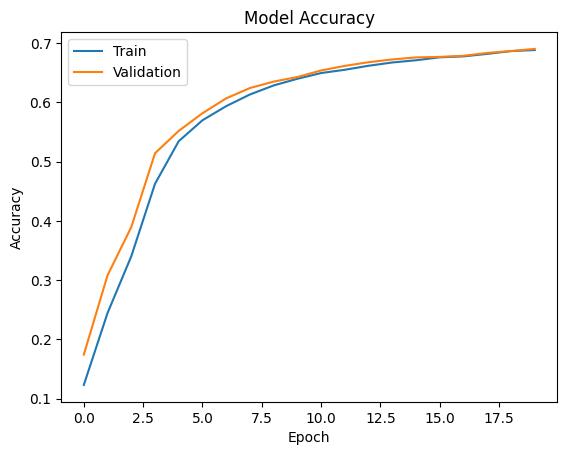

In [50]:
# draw a plot of the training and validation accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:_______**

* The plot shows that the training and validation show almost the same accuracy. The model doesn't overfit the training data.
* The accuracy slowly increases much after epochs of 7.5. The most efficient point of epoch is between 5 and 7.5. However, as the validation accuracy increases with more passing (epochs) of training data, it may be worthwhile to try a bigger value for ephoch to see whether the validation accurary increases further.   

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [51]:
# Clearing the backend
backend.clear_session()

# Fix the seed for random number generators, again
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [52]:
def build_model_2():
    # create sequential model
    model = Sequential()

    # first hidden layer with 256 nodes and relu activation
    model.add(Dense(256, activation='relu', input_shape=(1024,)))

    # second hidden layer with 128 nodes and relu activation
    model.add(Dense(128, activation='relu'))

    # dropout layer with rate 0.2
    model.add(Dropout(0.2))

    # third hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))

    # fourth hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))

    # fifth hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))

    # add BatchNormalization layer
    model.add(BatchNormalization())

    # add the output layer with softmax activation and number of nodes equal to the number of classes (=10)
    model.add(Dense(10, activation='softmax'))

    # compile the model with the loss equal to categorical_crossentropy,
    # optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'.
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

# Create the model
model_2 = build_model_2()

# Summary of the model architecture
model_2.summary()

# Fit on the train data
history_2 = model_2.fit(
            x_train_flattened,
            y_train_encoded,
            validation_split = 0.2,
            batch_size=128,
            epochs = 30,
            shuffle = True, # specify shuffling option, the default is True
            verbose = 1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1008 - loss: 2.4744 - val_accuracy: 0.1013 - val_loss: 2.3127
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.2977 - val_accuracy: 0.2490 - val_loss: 2.1423
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3249 - loss: 1.8986 - val_accuracy: 0.4839 - val_loss: 1.5519
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5011 - loss: 1.4783 - val_accuracy: 0.5757 - val_loss: 1.3010
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5813 - loss: 1.2768 - val_accuracy: 0.6081 - val_loss: 1.2000
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6285 - loss: 1.1571 - val_accuracy: 0.6469 - val_loss: 1.1038
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6579 - loss: 1.0798 - val_accuracy: 0.6538 - val_loss: 1.0607
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6650 - loss: 1.0442 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

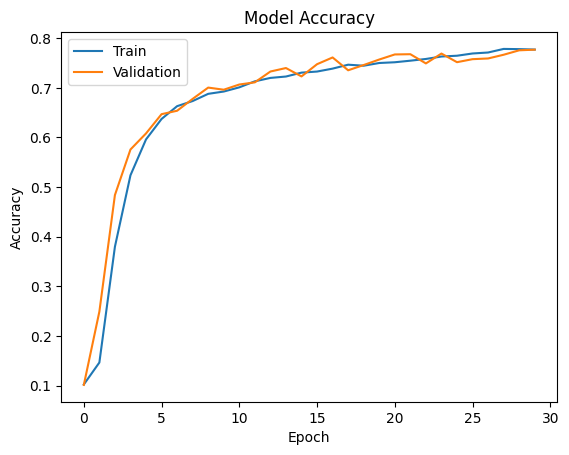

In [53]:
# draw a plot of the training and validation accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:_______**


* The plot shows that the training and validation increase similarly, even though validation accuracy was higher than training before ephoch=12.
* The accuracy slowly increases much after epochs of 10. The most efficient point of epoch is around 10.  

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [54]:
# make predictions on the test set
y_pred_test = model_2.predict(x_test_flattened)

# convert predictions to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

  1/563 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step

563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**


Classification Report:


              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1814
           1       0.76      0.81      0.78      1828
           2       0.80      0.80      0.80      1803
           3       0.76      0.74      0.75      1719
           4       0.76      0.85      0.80      1812
           5       0.70      0.76      0.73      1768
           6       0.74      0.79      0.76      1832
           7       0.81      0.81      0.81      1808
           8       0.74      0.73      0.73      1812
           9       0.81      0.70      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000


Confusion Matrix:
[[1346   52   30   40   55   34  101   26   63   67]
 [  14 1472   22   49   83   34   28   67   40   19]
 [   9   42 1447   46   38   32   20  103   33   33]
 [  11   46   57 1278   34  148   24   48   50   23]
 [  12   5

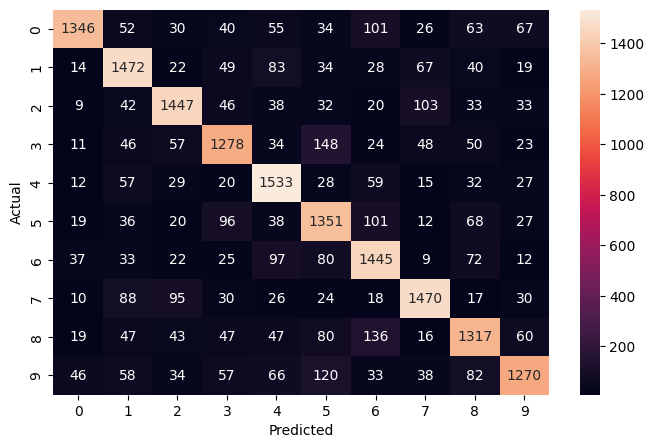

accuracy rate for digit 0 is 74.2%
accuracy rate for digit 1 is 80.5%
accuracy rate for digit 2 is 80.3%
accuracy rate for digit 3 is 74.3%
accuracy rate for digit 4 is 84.6%
accuracy rate for digit 5 is 76.4%
accuracy rate for digit 6 is 78.9%
accuracy rate for digit 7 is 81.3%
accuracy rate for digit 8 is 72.7%
accuracy rate for digit 9 is 70.4%


In [55]:
# print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_classes))

# print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test_classes)
print(cm)

# plotting the heatmap using confusion matrix
print("\nHeatmap of Confusion Matrix:")

plt.figure(figsize = (8, 5))
# sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = cifar10_classes, yticklabels = cifar10_classes)
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Display the plot
plt.show()

# calclate rate of correct identification for each digit
for i in range(10):
  total_i = sum(cm[i])
  accurate_i = cm[i][i]
  percentage = '{:.1f}%'.format(100 * accurate_i / total_i)
  print("accuracy rate for digit " + str(i) + " is " + str(percentage))


**Final Observations:__________**

* f1-score of the model is between 0.71 to 0.79. On average, precision and recall are about the same.
* When accuracy for each digit is calculated, the prediction accuracy for digit '1' is the highest. It means that when the actual digit is '1', prediction based on the model is more accurate than other digits.
* The accuracy for '9' is the lowest. It seems that '9' is confused with '1', '8', or '4' more than other digits.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [56]:
# read the data file
h5f = h5.File('./SVHN_Digit_Recognition_Dataset.h5')

# assign x_test, x_train, x_val, y_test, y_train, y_val for later use
x_test = h5f["X_test"][:]
x_train = h5f["X_train"][:]
x_val = h5f["X_val"][:]
y_test = h5f["y_test"][:]
y_train = h5f["y_train"][:]
y_val = h5f["y_val"][:]

# close h5 file to save memory
h5f.close()

Check the number of images in the training and the testing dataset.

In [57]:
# check the number of images in train and test sets
print("x_train has " + str(len(x_train)) + " of images.")
print("x_test has " + str(len(x_test)) + " of images.")
print("each record of x_test has an image of " + str(x_test.shape[1]) + "x" + str(x_test.shape[2]) + " pixels.")

x_train has 42000 of images.
x_test has 18000 of images.
each record of x_test has an image of 32x32 pixels.


**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [58]:
# print the shape of the train array and the array of pixels in the first image
print("shape of x_train: " + str(x_train.shape))
print("array of x_train[0]: " + str(x_train[0]))

print("shape of x_test: " + str(x_test.shape))
print("array of x_test[0]: " + str(x_test[0]))

# print the shape of the train array and the value of the first item
print("shape of y_train: " + str(y_train.shape))
print("value of y_train[0]: " + str(y_train[0]))

print("shape of y_test: " + str(y_test.shape))
print("value of y_test[0]: " + str(y_test[0]))

shape of x_train: (42000, 32, 32)
array of x_train[0]: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
shape of x_test: (18000, 32, 32)
array of x_test[0]: [[ 40.558   46.7917  48.9764 ... 112.1153 112.9904 112.1646]
 [ 39.4379  44.2911  47.1768 ... 111.0122 110.9475 109.9368]
 [ 38.4488  43.6394  48.7098 ... 109.8921 109.9414 109.1048]
 ...
 [ 34.9869  35.4707  39.6676 ... 109.211  109.9074 112.7346]
 [ 35.6602  35.5462  40.3193 ... 110.9998 112.049  114.3431]
 [ 36.1871  35.4214  40.6998 ... 110.0169 111.2017 114.1906]]
shape of y_train: (42000,)
value of y_train[0]: 2
shape of y_test: (18000,)
value of y_test[0]: 1


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [59]:
# reshape the arrays into 4D array
x_train_4d = np.expand_dims(x_train, axis=-1)  # Add an extra dimension for the channel
x_test_4d = np.expand_dims(x_test, axis=-1)

Normalize inputs from 0-255 to 0-1

In [60]:
# normalize the train and test data set
x_train_normalized = x_train_4d/255
x_test_normalized = X_test_4d/255

Print New shape of Training and Test

In [61]:
# print the shape of the train array and the array of pixels in the first image
print("shape of x_train_normalized: " + str(x_train_normalized.shape))
print("array of x_train_normalized[0]: " + str(x_train_normalized[0]))

print("shape of x_test_normalized: " + str(x_test_normalized.shape))
print("array of x_test_normalized[0]: " + str(x_test_normalized[0]))

shape of x_train_normalized: (42000, 32, 32, 1)
array of x_train_normalized[0]: [[[0.12968785]
  [0.11866706]
  [0.10530196]
  ...
  [0.2801847 ]
  [0.2283153 ]
  [0.16860352]]

 [[0.09893451]
  [0.10020902]
  [0.1175549 ]
  ...
  [0.4432192 ]
  [0.40534863]
  [0.33056822]]

 [[0.10304902]
  [0.08868118]
  [0.15873058]
  ...
  [0.44432473]
  [0.47754902]
  [0.45263842]]

 ...

 [[0.11196157]
  [0.14200786]
  [0.17678471]
  ...
  [0.09465059]
  [0.09840274]
  [0.10219726]]

 [[0.15072627]
  [0.10381687]
  [0.09126157]
  ...
  [0.11023294]
  [0.11556196]
  [0.11790627]]

 [[0.19724864]
  [0.10226392]
  [0.0942702 ]
  ...
  [0.19477727]
  [0.19942354]
  [0.20799099]]]
shape of x_test_normalized: (18000, 32, 32, 1)
array of x_test_normalized[0]: [[[0.15905097]
  [0.18349686]
  [0.19206432]
  ...
  [0.43966785]
  [0.44309962]
  [0.43986115]]

 [[0.15465844]
  [0.17369059]
  [0.18500705]
  ...
  [0.43534195]
  [0.43508825]
  [0.4311247 ]]

 [[0.1507796 ]
  [0.1711349 ]
  [0.19101882]
  ...
 

### **One-hot encode the labels in the target variable y_train and y_test.**

In [62]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# print the shape of the train array and the value of the first item after encoding
print("shape of y_train_encoded: " + str(y_train_encoded.shape))
print("value of y_train_encoded[0]: " + str(y_train_encoded[0]))

print("shape of y_test_encoded: " + str(y_test_encoded.shape))
print("value of y_tey_test_encodedst[0]: " + str(y_test_encoded[0]))

shape of y_train_encoded: (42000, 10)
value of y_train_encoded[0]: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
shape of y_test_encoded: (18000, 10)
value of y_tey_test_encodedst[0]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [63]:
# Clearing the backend
backend.clear_session()

# Fix the seed for random number generators, again
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [64]:
def build_cnn_model_1():
    # create sequential model
    model = Sequential()

    # first convolutional layer with 16 filters, kernel size of 3x3, use 'same' padding, and input shape (32, 32, 1)
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))

    # add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))

    # second convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))

    # add another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))

    # add max pooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # flatten the output from the previous layer
    model.add(Flatten())

    # add a dense layer with 32 nodes
    model.add(Dense(32))

    # add another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))

    # final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    model.add(Dense(10, activation='softmax'))

    # compile the model with the loss equal to categorical_crossentropy,
    # optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# create the convolutional model
cnn_model_1 = build_cnn_model_1()

# summary of the model architecture
print(cnn_model_1.summary())

# Fit on the train data
cnn_history_1 = cnn_model_1.fit(
            x_train_normalized,
            y_train_encoded,
            validation_split = 0.2,
            batch_size=32,
            epochs = 20,
            shuffle = True, # specify shuffling option, the default is True
            verbose = 1
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4085 - loss: 1.6696 - val_accuracy: 0.8129 - val_loss: 0.6460
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8347 - loss: 0.5740 - val_accuracy: 0.8385 - val_loss: 0.5619
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8658 - loss: 0.4672 - val_accuracy: 0.8568 - val_loss: 0.5180
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8839 - loss: 0.4043 - val_accuracy: 0.8688 - val_loss: 0.4974
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8963 - loss: 0.3588 - val_accuracy: 0.8657 - val_loss: 0.5022
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9082 - loss: 0.3196 - val_accuracy: 0.8650 - val_loss: 0.5096
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9178 - loss: 0.2836 - val_accuracy: 0.8625 - val_loss: 0.5204
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9

### **Plot the Training and Validation Accuracies and Write your observations.**

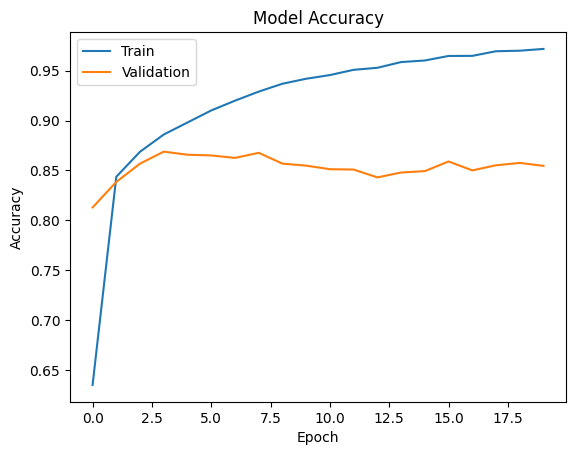

In [65]:
# draw a plot of the training and validation accuracy
plt.plot(cnn_history_1.history['accuracy'])
plt.plot(cnn_history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:__________**


* The plot shows that the validation accuracy drops after 2.5 ephoch. The model overfits the training data.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [66]:
# Clearing the backend
backend.clear_session()

# Fix the seed for random number generators, again
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [67]:
def build_cnn_model_2():
    # Create sequential model
    model = Sequential()

    # first convolutional layer with 16 filters, kernel size of 3x3, 'same' padding, and input shape (32, 32, 1)
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))

    # add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))

    # second convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))

    # add another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))

    # add max pooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # add batch normalization layer
    model.add(BatchNormalization())

    # third convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # fourth convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # add max pooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # add batch normalization layer
    model.add(BatchNormalization())

    # flatten the output from the previous layer
    model.add(Flatten())

    # add a dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # add a dropout layer with rate 0.5
    model.add(Dropout(0.5))


    # final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    model.add(Dense(10, activation='softmax'))

    # compile the model with the loss equal to categorical_crossentropy,
    # optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    return model

# create the convolutional model
cnn_model_2 = build_cnn_model_2()

# Summary of the model architecture
print(cnn_model_2.summary())

# Fit on the train data
cnn_history_2 = cnn_model_2.fit(
            x_train_normalized,
            y_train_encoded,
            validation_split = 0.2,
            batch_size=128,
            epochs = 30,
            shuffle = True, # specify shuffling option, the default is True
            verbose = 1
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

None
Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 95ms/step - accuracy: 0.3465 - loss: 1.8830 - val_accuracy: 0.3705 - val_loss: 1.7742
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.7779 - loss: 0.7234 - val_accuracy: 0.8442 - val_loss: 0.5652
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.8290 - loss: 0.5747 - val_accuracy: 0.8731 - val_loss: 0.4373
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.8454 - loss: 0.5029 - val_accuracy: 0.8892 - val_loss: 0.3902
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.8614 - loss: 0.4583 - val_accuracy: 0.8939 - val_loss: 0.3862
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.8730 - loss: 0.4143 - val_accuracy: 0.8908 - val_loss: 0.3807
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.8833 - loss: 0.3874 - val_accuracy: 0.9005 - val_loss: 0.3487
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.8894 - loss: 0.36

### **Plot the Training and Validation accuracies and write your observations.**

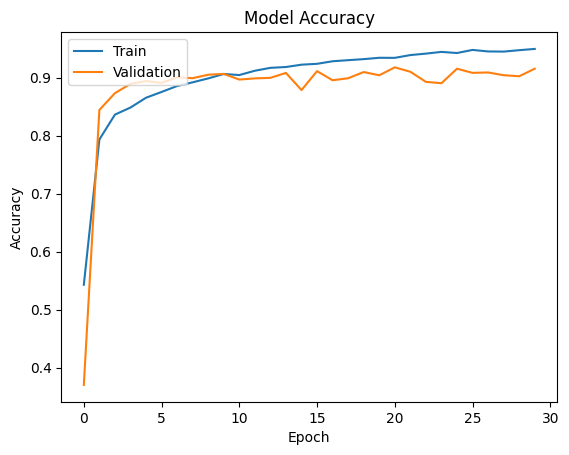

In [68]:
# draw a plot of the training and validation accuracy
plt.plot(cnn_history_2.history['accuracy'])
plt.plot(cnn_history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:________**


* The plot shows that the validation accuracy is higher before ephoch of 7.5, but it is lower than training accuracy.
* The model overfits the training data until ephoch of 7.5 but the result is changed after that. 


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [69]:
# make predictions on the test set
y_pred_test = cnn_model_2.predict(x_test_normalized)

# convert predictions to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1814
           1       0.90      0.92      0.91      1828
           2       0.96      0.90      0.93      1803
           3       0.87      0.89      0.88      1719
           4       0.94      0.93      0.93      1812
           5       0.86      0.93      0.89      1768
           6       0.90      0.89      0.90      1832
           7       0.93      0.93      0.93      1808
           8       0.89      0.89      0.89      1812
           9       0.93      0.88      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000


Confusion Matrix:
[[1692   25    5    5    7    5   27    7   15   26]
 [  22 1684   10   17   33    7   10   28   13    4]
 [  10   18 1622   33   15    8    5   42   21   29]
 [   4   14   11 1531    8   83   18   

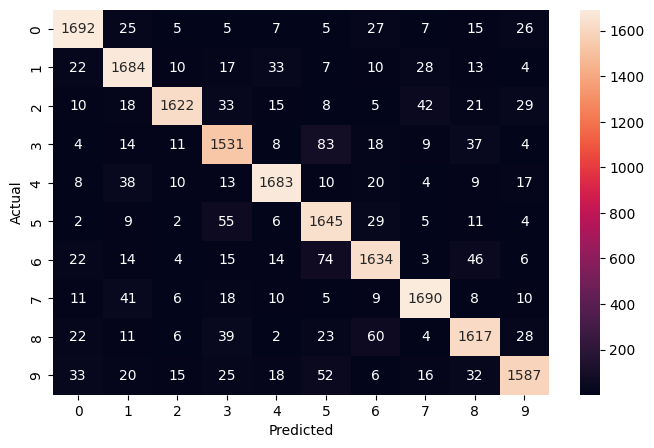

accuracy rate for digit 0 is 93.3%
accuracy rate for digit 1 is 92.1%
accuracy rate for digit 2 is 90.0%
accuracy rate for digit 3 is 89.1%
accuracy rate for digit 4 is 92.9%
accuracy rate for digit 5 is 93.0%
accuracy rate for digit 6 is 89.2%
accuracy rate for digit 7 is 93.5%
accuracy rate for digit 8 is 89.2%
accuracy rate for digit 9 is 88.0%


In [70]:
# print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_classes))

# print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test_classes)
print(cm)

# plotting the heatmap using confusion matrix
print("\nHeatmap of Confusion Matrix:")

plt.figure(figsize = (8, 5))
# sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = cifar10_classes, yticklabels = cifar10_classes)
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Display the plot
plt.show()

# calclate rate of correct identification for each digit
for i in range(10):
  total_i = sum(cm[i])
  accurate_i = cm[i][i]
  percentage = '{:.1f}%'.format(100 * accurate_i / total_i)
  print("accuracy rate for digit " + str(i) + " is " + str(percentage))


### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**

* f1-score of CNN model is between 0.89 to 0.93, which is higher than ANN model.
* When accuracy for each digit is calculated, the prediction accuracy for digit '0' is the highest. but overall all digits show the accuracy of around 90%. Clearly, CNN has better performance than ANN. 